In [31]:
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
crash_df = sns.load_dataset("car_crashes")
crash_df.head()



,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [32]:
crash_df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [33]:
crash_df = crash_df.drop(columns=['abbrev'])
#crash_df = crash_df.drop(columns=['ins_premium'])
#crash_df = crash_df.drop(columns=['ins_losses'])

crash_df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [34]:
import sklearn;
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = crash_df.drop('total', axis=1), crash_df[['total']]

# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
  X[col] = X[col].astype('category')

X.dtypes

speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
dtype: object

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

import xgboost as xgb

# Instantiation 
xgb_r = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 100, seed = 123,enable_categorical=True) 

# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
pred = xgb_r.predict(X_test) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 


RMSE :  1.873322


In [36]:
#Using Validation

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

import xgboost as xgb

# Instantiation 
xgb_r = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 100, seed = 123,enable_categorical=True,early_stopping_rounds=5) 

# Fitting the model, with VALIDATION with addtnal param eval_set
xgb_r.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_test,y_test)]) 


# Predict the model 
pred = xgb_r.predict(X_test) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 
print("best iteration is:")
print(xgb_r.best_iteration)



[0]	validation_0-rmse:3.18684	validation_1-rmse:2.70402
[1]	validation_0-rmse:2.46646	validation_1-rmse:2.04796
[2]	validation_0-rmse:1.92419	validation_1-rmse:1.70433
[3]	validation_0-rmse:1.51536	validation_1-rmse:1.58848
[4]	validation_0-rmse:1.20348	validation_1-rmse:1.57041
[5]	validation_0-rmse:0.96559	validation_1-rmse:1.66692
[6]	validation_0-rmse:0.78382	validation_1-rmse:1.77228
[7]	validation_0-rmse:0.64645	validation_1-rmse:1.85248
[8]	validation_0-rmse:0.52520	validation_1-rmse:1.81818
[9]	validation_0-rmse:0.43013	validation_1-rmse:1.80090
RMSE :  1.570408
best iteration is:
4


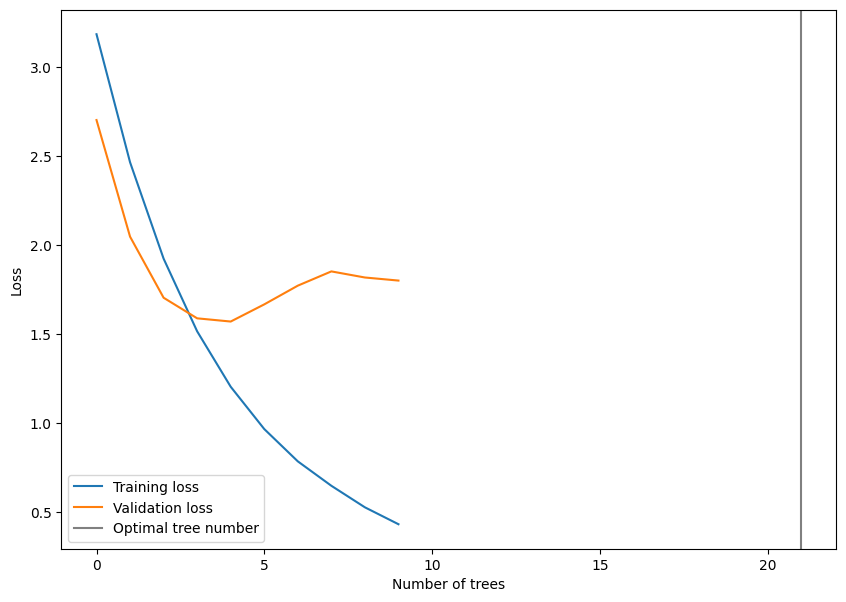

In [37]:
results = xgb_r.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [38]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)


# Display Results
print(f"📌 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📌 R-squared (R² Score): {r2:.4f}")
print(f"📌 Mean Absolute Percentage Error (MAPE): {mape:.4%}")  # Percentage format

📌 Mean Absolute Error (MAE): 1.2318
📌 Mean Squared Error (MSE): 2.4662
📌 Root Mean Squared Error (RMSE): 1.5704
📌 R-squared (R² Score): 0.8278
📌 Mean Absolute Percentage Error (MAPE): 7.9262%
